#Conversion Of Hand Drawn Image to Extractable Path

##Initialisation

###Importing Required Modules And Functions

In [75]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
from skimage.util import img_as_ubyte
from skimage import io
from csv import writer

###Getting The Input Image

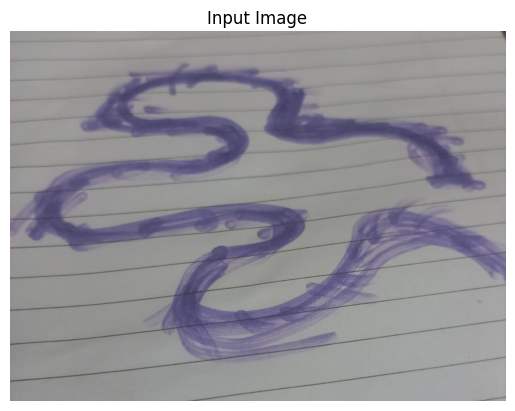

In [76]:
image = io.imread('https://raw.githubusercontent.com/siva-2006/DoodleBot/refs/heads/assignment-0-Sivaganesh/Week0/CV/Siva_241019/Input_image.jpg')
plt.imshow(image)
plt.title('Input Image')
plt.axis(False)
plt.show()

##Applying Image Transformations

###Converting to HSV and Applying Colour Masking after Noise Reduction

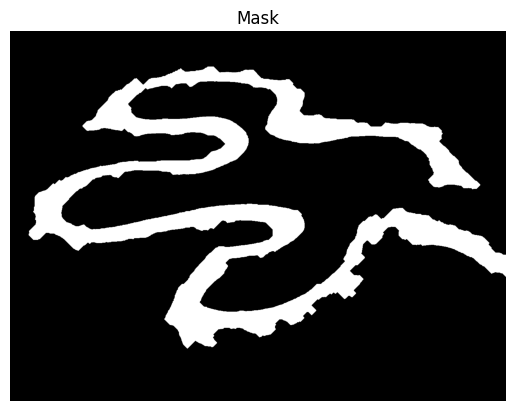

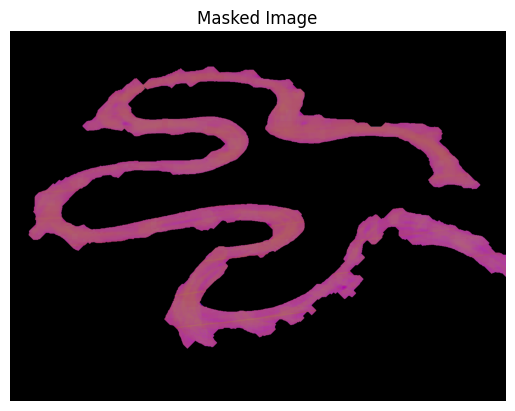

In [77]:
hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

#Defining HSV Range for Path
lower = np.array([100, 50, 50])
upper = np.array([180, 255, 255])

#Extracting Mask from HSV Image
mask = cv.inRange(hsv, lower, upper)

#Removing Noise from the mask
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))

# 1. Opening: erode→dilate  (kill tiny white dots)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=11)

# 2. Closing: dilate→erode (seal small holes & breaks)
mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel, iterations=11)

# 3. median blur for smooth edges
mask = cv.medianBlur(mask, 3)

#Applying Colour Masking
masked_img = cv.bitwise_and(hsv, hsv, mask = mask)

plt.imshow(mask, cmap = 'gray')
plt.title('Mask')
plt.axis(False)
plt.show()

plt.imshow(masked_img, cmap = 'hsv')
plt.title('Masked Image')
plt.axis(False)
plt.show()


###Skeletonizing the Mask

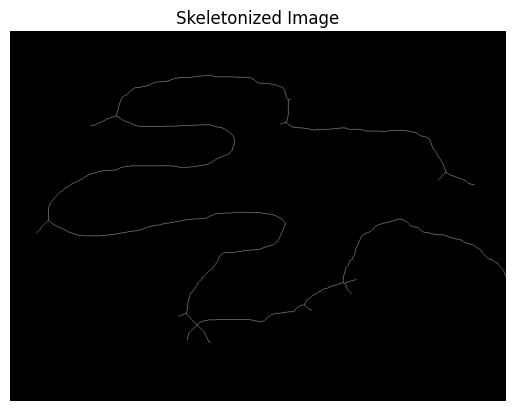

In [80]:
skeleton = skeletonize(mask)

skel_img = img_as_ubyte(skeleton)

plt.imshow(skel_img, cmap = 'gray')
plt.title('Skeletonized Image')
plt.axis(False)
plt.show()

###Getting Contours from Skeletonized Image And Displaying Over Input Image

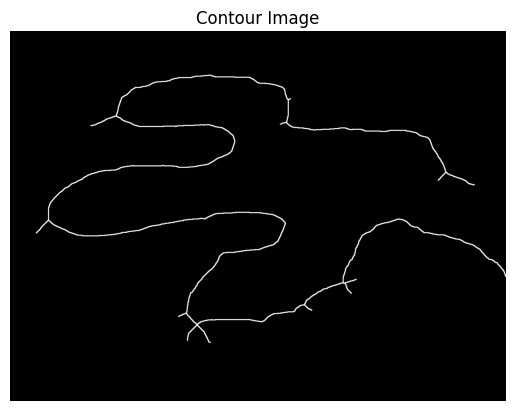

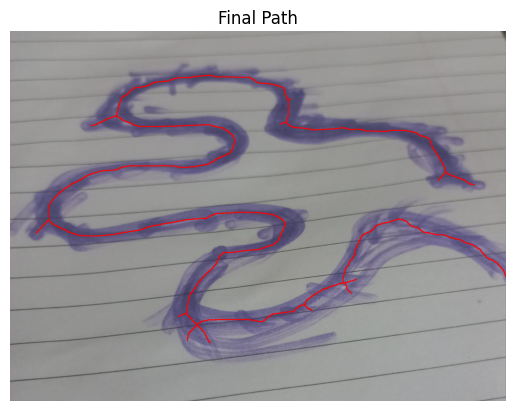

In [81]:
contours, _ = cv.findContours(skel_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

cont_img = np.zeros(image.shape, dtype = 'uint8')

cv.drawContours(cont_img, contours, -1, (255, 255, 255), 2)

plt.imshow(cont_img)
plt.title('Contour Image')
plt.axis(False)
plt.show()

final_image = image.copy()

cv.drawContours(final_image, contours, -1, (255, 0, 0), 2)

plt.imshow(final_image)
plt.title('Final Path')
plt.axis(False)
plt.show()

##Exporting Path To CSV File

In [82]:
with open("Output.csv", "w", newline="") as csvfile:
  writer = writer(csvfile)
  writer.writerow(["x", "y"])
  for c in contours:
    pts = c.squeeze()
    if pts.ndim != 2 or len(pts) < 2:
      continue
    for x, y in pts:
      writer.writerow([int(x), int(y)])
print("CSV saved to Output.csv (columns: x,y)")

CSV saved to Output.csv (columns: x,y)
